# Check patients with more than 1 extra folder.

**Problem:**

The is the main folder structure:

```
Train
|
|- Patient1_RIGHT_CC <-- contains the full mammogram.
|  |- 1-1.dcm
|
|- Patient1_RIGHT_CC_1 <-- contrains the cropped ROI image and the mask.
|  |- 1-1.dcm
|  |- 1-2.dcm
|
|...
```

But, there are some patients that have more than 1 extra folder. For example,

```
Train
|
|- Patient1_RIGHT_CC <-- contains the full mammogram.
|  |- 1-1.dcm
|
|- Patient1_RIGHT_CC_1 <-- contrains the cropped ROI image and the mask.
|  |- 1-1.dcm
|  |- 1-2.dcm
|
|- Patient1_RIGHT_CC_2 <-- ?
|  |- 1-1.dcm
|  |- 1-2.dcm
|
|- Patient1_RIGHT_CC_3 <-- ?
|  |- 1-1.dcm
|  |- 1-2.dcm
|
|- Patient1_RIGHT_CC_4 <-- ?
|  |- 1-1.dcm
|  |- 1-2.dcm
|
|...
```

Specifically, we look at patient:
- **`P_00044_RIGHT_CC`**
- **`P_00044_RIGHT_CC_1`**
- **`P_00044_RIGHT_CC_2`**
- **`P_00044_RIGHT_CC_3`**
- **`P_00044_RIGHT_CC_4`**

<br>

**Conclusion:**
1. These mammograms have more than one abnormality. Each abnormality has its corresponding cropped ROI image and its mask, which is stored in individual folders. Hence the multiple folders.

In [2]:
import matplotlib.pyplot as plt
import pandas            as pd
import numpy             as np
import cv2
import pydicom
import skimage

import modules.imagePreprocessing as iP


In [3]:
selected_paths = ["../data-strange/Mass-Training_P_00044_RIGHT_CC/07-20-2016-DDSM-79148/1.000000-full mammogram images-44331/1-1.dcm",
                  "../data-strange/Mass-Training_P_00044_RIGHT_CC_1/07-21-2016-DDSM-75344/1.000000-ROI mask images-25492/1-1.dcm",
                  "../data-strange/Mass-Training_P_00044_RIGHT_CC_1/07-21-2016-DDSM-75344/1.000000-ROI mask images-25492/1-2.dcm",
                  "../data-strange/Mass-Training_P_00044_RIGHT_CC_2/07-21-2016-DDSM-33313/1.000000-ROI mask images-60878/1-1.dcm",
                  "../data-strange/Mass-Training_P_00044_RIGHT_CC_2/07-21-2016-DDSM-33313/1.000000-ROI mask images-60878/1-2.dcm",
                  "../data-strange/Mass-Training_P_00044_RIGHT_CC_3/07-21-2016-DDSM-14174/1.000000-ROI mask images-14592/1-1.dcm",
                  "../data-strange/Mass-Training_P_00044_RIGHT_CC_3/07-21-2016-DDSM-14174/1.000000-ROI mask images-14592/1-2.dcm",
                  "../data-strange/Mass-Training_P_00044_RIGHT_CC_4/07-21-2016-DDSM-00793/1.000000-ROI mask images-80968/1-1.dcm",
                  "../data-strange/Mass-Training_P_00044_RIGHT_CC_4/07-21-2016-DDSM-00793/1.000000-ROI mask images-80968/1-2.dcm"]

ds1 = pydicom.dcmread(selected_paths[0])
ds2 = pydicom.dcmread(selected_paths[1])
ds3 = pydicom.dcmread(selected_paths[2])
ds4 = pydicom.dcmread(selected_paths[3])
ds5 = pydicom.dcmread(selected_paths[4])
ds6 = pydicom.dcmread(selected_paths[5])
ds7 = pydicom.dcmread(selected_paths[6])
ds8 = pydicom.dcmread(selected_paths[7])
ds9 = pydicom.dcmread(selected_paths[8])

ds = [ds1, ds2, ds3, ds4, ds5, ds6, ds7, ds8, ds9]

arr1 = ds1.pixel_array
arr2 = ds2.pixel_array
arr3 = ds3.pixel_array
arr4 = ds4.pixel_array
arr5 = ds5.pixel_array
arr6 = ds6.pixel_array
arr7 = ds7.pixel_array
arr8 = ds8.pixel_array
arr9 = ds9.pixel_array

arr = [arr1, arr2, arr3, arr4, arr5, arr6, arr7, arr8, arr9]

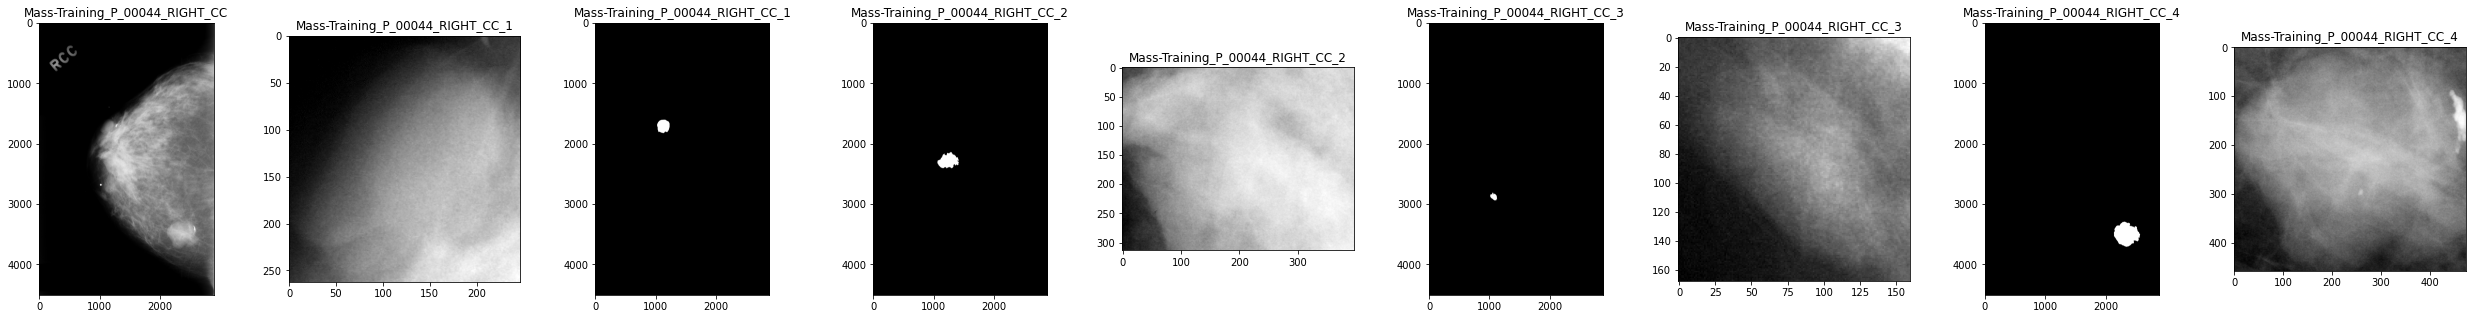

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=len(selected_paths), figsize = (44, 5))

# Plot image
for i in range(len(selected_paths)):
    ax[i].imshow(arr[i], cmap="gray")
    ax[i].set_title(f"{ds[i].PatientID}")
    
# plt.tight_layout()
# plt.savefig(fname="../outputs/image-preprocessing/remove-pectoral/original.png", dpi=300)